In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


The highest crime frequncey happen in: 12
Area has the largest frequency of night crimes is: Central
Age of 26-34    47470
Age of 35-44    42157
Age of 45-54    28353
Age of 18-25    28291
Age of 55-64    20169
Age of 65+      14747
Age of 0-17      4528
Name: Binned Age, dtype: int64


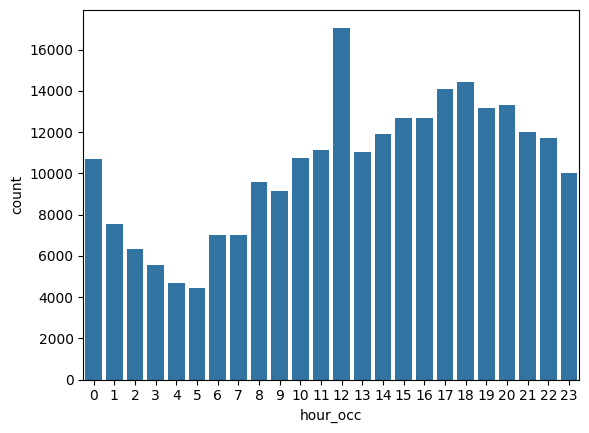

In [31]:
# Extracting hour from the "TIME OCC" column and converting it to integer
crimes["hour_occ"] = crimes["TIME OCC"].str[:2].astype(int)

# Calculating normalized frequency of crime occurrences by hour
hourly_crime_freq = crimes["hour_occ"].value_counts(normalize=True)

# Visualizing the distribution of crime occurrences by hour
sns.countplot(data=crimes, x="hour_occ")

# Setting peak crime hour
peak_crime_hour = 12
print("The highest crime frequency occurs at:", peak_crime_hour)

# Filtering night crimes (from 10 PM to 4 AM) and identifying area with the highest frequency of night crimes
nights = crimes[crimes["hour_occ"].isin([22,23,0,1,2,3])]
peak_night_crime_location = nights.groupby("AREA NAME", as_index=False)["hour_occ"].count().sort_values("hour_occ", ascending=False).iloc[0]["AREA NAME"]
print("The area with the largest frequency of night crimes is:", peak_night_crime_location)

# Defining age bins and labels, categorizing victim ages into age groups, and counting occurrences
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["Age of 0-17", "Age of 18-25", "Age of 26-34", "Age of 35-44", "Age of 45-54", "Age of 55-64", "Age of 65+"]
crimes["Binned Age"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels)
victim_ages = crimes["Binned Age"].value_counts()

# Displaying the distribution of victim ages
print(victim_ages)
